In [26]:
import pandas as pd
data = pd.read_csv('chicago_crimes.csv')  # Ajusta el nombre del archivo según corresponda
print(data.head())  # Verifica las primeras filas del DataFrame original
print(data.shape)   # Verifica las dimensiones del DataFrame original

         ID Case Number                    Date                 Block  IUCR  \
0  13644536    JH485110  10/25/2024 12:00:00 AM     042XX N MASON AVE  1153   
1  13643287    JH483556  10/25/2024 12:00:00 AM    036XX N LEAVITT ST  1130   
2  13641969    JH481866  10/25/2024 12:00:00 AM  041XX W PETERSON AVE  0710   
3  13642350    JH482372  10/25/2024 12:00:00 AM    015XX S WABASH AVE  2820   
4  13645280    JH485785  10/25/2024 12:00:00 AM     018XX W WALNUT ST  1130   

         Primary Type                          Description  \
0  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   
2               THEFT             THEFT FROM MOTOR VEHICLE   
3       OTHER OFFENSE                     TELEPHONE THREAT   
4  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     RESIDENCE   False     False  ...  38.0            

In [27]:
data['Location Description'] = data['Location Description'].fillna('Unknown')

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Limpiar los datos eliminando filas con valores nulos
data_cleaned = data.dropna()

In [5]:
print(data.head())  # Verifica las primeras filas del DataFrame original

         ID Case Number                    Date                 Block  IUCR  \
0  13644536    JH485110  10/25/2024 12:00:00 AM     042XX N MASON AVE  1153   
1  13643287    JH483556  10/25/2024 12:00:00 AM    036XX N LEAVITT ST  1130   
2  13641969    JH481866  10/25/2024 12:00:00 AM  041XX W PETERSON AVE  0710   
3  13642350    JH482372  10/25/2024 12:00:00 AM    015XX S WABASH AVE  2820   
4  13645280    JH485785  10/25/2024 12:00:00 AM     018XX W WALNUT ST  1130   

         Primary Type                          Description  \
0  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   
2               THEFT             THEFT FROM MOTOR VEHICLE   
3       OTHER OFFENSE                     TELEPHONE THREAT   
4  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     RESIDENCE   False     False  ...  38.0            

In [6]:
# Convertir características categóricas a numéricas
categorical_columns = ['Primary Type', 'Description', 'Location Description']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [7]:
# Separar las características y el objetivo
X = data_cleaned.drop(columns=['Arrest', 'Domestic', 'Case Number', 'Domestic', 'Date', 'Block', 'Updated On', 'Location', 'IUCR', 'FBI Code'])
y_arrest = data_cleaned['Arrest']
y_domestic = data_cleaned['Domestic']

In [8]:
# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2,
random_state=42)
X_train, X_test, y_domestic_train, y_domestic_test = train_test_split(X_scaled, y_domestic,
test_size=0.2, random_state=42)

In [9]:
print(X_scaled[:5])

[[ 1.02205941 -0.47538959 -0.38708131  0.42862927  0.66943663  0.66832114
   1.06493931 -1.00444601 -1.77999627  1.28281751  1.40374951  1.28668528
  -1.77828881]
 [ 1.02060883 -0.47538959 -0.33155678 -0.94487217  1.09050701  1.09389383
   1.70947856 -1.46776635 -0.25224658  1.17342836  1.40374951  1.17200515
  -0.23630589]
 [ 1.01907811  1.34590533  1.07737819  0.87501724  0.79278048  0.8101787
   1.13655478 -1.09711008 -1.05740374  1.65690839  1.40374951  1.65743488
  -1.04303825]
 [ 1.0195206   0.68361627  1.02185366 -1.61445412 -1.44725726 -1.45954231
  -1.44160221 -0.17046941  0.71840464  0.19400069  1.40374951  0.19080313
   0.72841284]
 [ 1.02292348 -0.47538959 -0.33155678  0.87501724  0.10092072  0.10089088
   0.27716912 -0.40212958 -0.06747934  0.47283027  1.40374951  0.47223474
  -0.06022954]]


In [12]:
!pip install numpy

In [13]:
!pip install numba

  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.40.1
    Uninstalling llvmlite-0.40.1:
      Successfully uninstalled llvmlite-0.40.1


In [14]:
!pip install shap

  Using cached shap-0.46.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
Using cached shap-0.46.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (540 kB)


In [11]:
import numpy

In [12]:
import numba

In [14]:
import shap

In [15]:
print(numpy.__version__)
print(numba.__version__)
print(shap.__version__)

1.24.0
0.60.0
0.46.0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
clf = RandomForestClassifier(n_estimators=10, random_state=42)  # Usar solo 10 árboles
clf.fit(X_train, y_arrest_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [18]:
# Calcular valores SHAP usando KernelExplainer para rapidez
explainer = shap.KernelExplainer(clf.predict, X_train[:100])  # Usar solo una muestra pequeña para inicializar
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Mantener los nombres originales de las columnas
X_test_sample = X_test_df.sample(n=1000, random_state=42)  # Toma una muestra de 1000 filas para acelerar el proceso

shap_values = explainer.shap_values(X_test_sample)

100%|███████████████████████████████████████████████████████████████████████████████████| 1000/1000 [19:58<00:00,  1.20s/it]


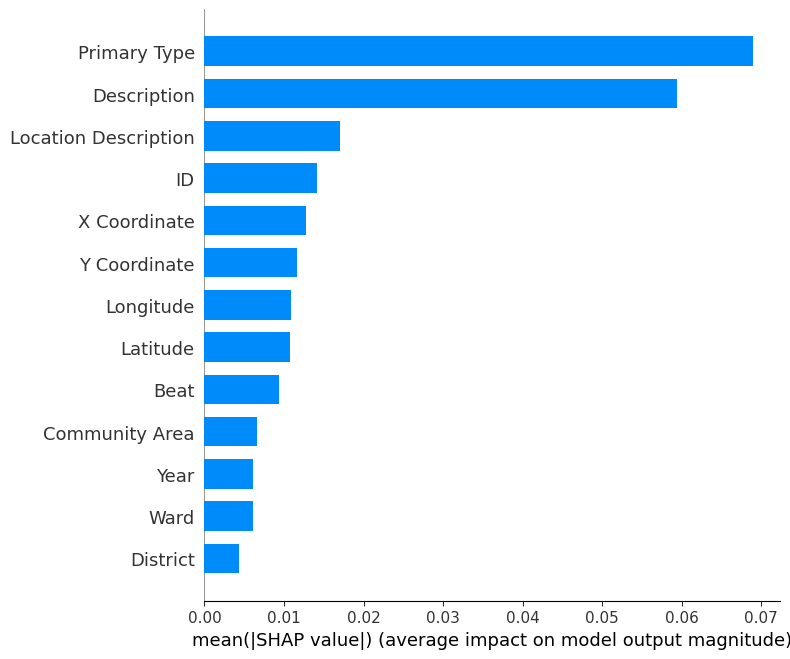

In [19]:
# Visualizar la importancia de las características
shap.summary_plot(shap_values, X_test_sample, plot_type='bar')

In [22]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 3.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━

In [20]:
import torch

In [21]:
import torch.nn as nn

In [22]:
import torch.optim as optim

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Definir la red neuronal
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Crear una instancia de la red neuronal
net = Net()

print(net)

Net(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)


In [25]:
# Convertir los datos a tensores
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_domestic_train_torch = torch.tensor(y_domestic_train.values, dtype=torch.float32)

In [26]:
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_domestic_test_torch = torch.tensor(y_domestic_test.values, dtype=torch.float32)

In [27]:
# Crear la red y definir la función de pérdida y el optimizador
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [28]:
# Entrenar la red neuronal
num_epochs = 100
for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_torch)
    loss = criterion(outputs, y_domestic_train_torch.view(-1, 1))
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.7178182601928711
Epoch 11, Loss: 0.6469779014587402
Epoch 21, Loss: 0.5908137559890747
Epoch 31, Loss: 0.5484313368797302
Epoch 41, Loss: 0.5179263949394226
Epoch 51, Loss: 0.496586412191391
Epoch 61, Loss: 0.4817136526107788
Epoch 71, Loss: 0.47092342376708984
Epoch 81, Loss: 0.4623675048351288
Epoch 91, Loss: 0.4549931585788727


In [29]:
# Evaluar la red neuronal
net.eval()
with torch.no_grad():
    outputs_test = net(X_test_torch)
    outputs_test = outputs_test.view(-1).round()
    accuracy = (outputs_test == y_domestic_test_torch).float().mean()
    print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.805565357208252


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
# Usar solo una muestra de 1000 filas para acelerar el proceso
X_train_sample = X_train[:1000]
y_arrest_train_sample = y_arrest_train[:1000]

In [32]:
# Modelos de clasificación
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42)
}

In [33]:
# Entrenar y evaluar los modelos
for model_name, model in models.items():
    model.fit(X_train_sample, y_arrest_train_sample)
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print(classification_report(y_arrest_test, y_pred))

--- Random Forest ---
              precision    recall  f1-score   support

       False       0.89      0.99      0.94    194922
        True       0.73      0.21      0.33     28927

    accuracy                           0.89    223849
   macro avg       0.81      0.60      0.63    223849
weighted avg       0.87      0.89      0.86    223849

--- SVM ---
              precision    recall  f1-score   support

       False       0.87      1.00      0.93    194922
        True       0.55      0.00      0.00     28927

    accuracy                           0.87    223849
   macro avg       0.71      0.50      0.47    223849
weighted avg       0.83      0.87      0.81    223849

--- Logistic Regression ---
              precision    recall  f1-score   support

       False       0.87      1.00      0.93    194922
        True       0.24      0.00      0.00     28927

    accuracy                           0.87    223849
   macro avg       0.56      0.50      0.47    223849
weighted avg

In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [35]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [36]:
# Clustering con KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

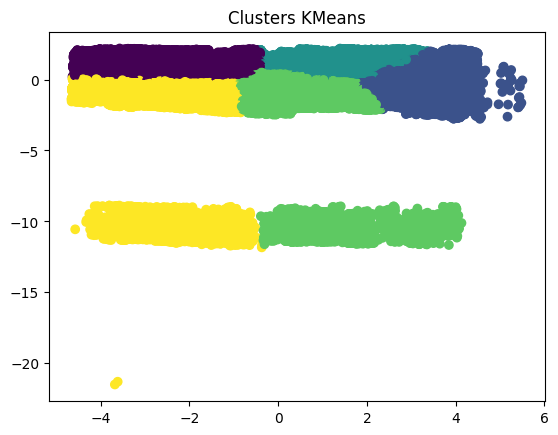

In [37]:
# Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters KMeans')
plt.show()

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Mostrar los tipos de datos de cada columna
print(data.dtypes)

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


In [42]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas a convertir
categorical_columns = ['Primary Type', 'Description', 'Location Description', 'Ward', 'FBI Code', 'Case Number', 'Date', 'Block', 'IUCR', 'Updated On', 'Location']

# Convertir columnas categóricas a numéricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Asegurarse de que los datos sean cadenas de texto antes de transformar
    label_encoders[col] = le

# Recalcular la matriz de correlación
corr_matrix = data.corr()
print(corr_matrix)

                            ID  Case Number      Date     Block      IUCR  \
ID                    1.000000     0.581120  0.064323 -0.016628  0.060848   
Case Number           0.581120     1.000000  0.117350 -0.021933 -0.015661   
Date                  0.064323     0.117350  1.000000 -0.001716 -0.030129   
Block                -0.016628    -0.021933 -0.001716  1.000000  0.016147   
IUCR                  0.060848    -0.015661 -0.030129  0.016147  1.000000   
Primary Type          0.069048    -0.011240  0.002048 -0.043720  0.175904   
Description           0.048425     0.023328  0.001675 -0.016740  0.156375   
Location Description  0.017414     0.029629 -0.009818 -0.104708 -0.057871   
Arrest               -0.050151    -0.035516 -0.037693 -0.042518  0.209148   
Domestic             -0.012148    -0.045738 -0.015055  0.102500 -0.040523   
Beat                  0.015614     0.007021  0.005816 -0.086310  0.000094   
District              0.015601     0.006971  0.005855 -0.086003  0.000082   

In [44]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 846.1 kB/s eta 0:00:0000:0100:01


In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
# Manejar el desequilibrio de datos en 'ARREST'
smote = SMOTE(random_state=42)
X_resampled, y_arrest_resampled = smote.fit_resample(X_train, y_arrest_train)

In [48]:
# Entrenar un modelo de clasificación de Random Forest con datos reequilibrados
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_arrest_resampled)

RandomForestClassifier(random_state=42)

In [49]:
# Evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_arrest_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95    194922
        True       0.68      0.56      0.61     28927

    accuracy                           0.91    223849
   macro avg       0.81      0.76      0.78    223849
weighted avg       0.90      0.91      0.90    223849



In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [52]:
# Entrenar un modelo de árbol de decisión
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_arrest_train)

DecisionTreeClassifier(random_state=42)

In [54]:
# Entrenar un modelo de bosque aleatorio
rforest = RandomForestClassifier(random_state=42)
rforest.fit(X_train, y_arrest_train)

RandomForestClassifier(random_state=42)

In [55]:
# Evaluar el árbol de decisión
y_pred_tree = dtree.predict(X_test)
print("Clasificación con Árbol de Decisión:")
print(classification_report(y_arrest_test, y_pred_tree))

Clasificación con Árbol de Decisión:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93    194922
        True       0.53      0.55      0.54     28927

    accuracy                           0.88    223849
   macro avg       0.73      0.74      0.73    223849
weighted avg       0.88      0.88      0.88    223849



In [56]:
# Evaluar el bosque aleatorio
y_pred_forest = rforest.predict(X_test)
print("Clasificación con Bosque Aleatorio:")
print(classification_report(y_arrest_test, y_pred_forest))

Clasificación con Bosque Aleatorio:
              precision    recall  f1-score   support

       False       0.93      0.98      0.96    194922
        True       0.81      0.51      0.62     28927

    accuracy                           0.92    223849
   macro avg       0.87      0.74      0.79    223849
weighted avg       0.91      0.92      0.91    223849



In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])

In [15]:
print(X_text.shape)
print(y_arrest.shape)

(1135769, 46)
(1119242,)


In [17]:
# Verificar el número de filas en X_text y y_arrest usando shape
if X_text.shape[0] > len(y_arrest):
    X_text = X_text[:len(y_arrest)]
elif len(y_arrest) > X_text.shape[0]:
    y_arrest = y_arrest[:X_text.shape[0]]

# Ahora dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)

In [18]:
print(X_text.shape)
print(y_arrest.shape)

(1119242, 46)
(1119242,)


In [19]:
# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

MultinomialNB()

In [20]:
# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93    194922
        True       0.00      0.00      0.00     28927

    accuracy                           0.87    223849
   macro avg       0.44      0.50      0.47    223849
weighted avg       0.76      0.87      0.81    223849



In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [22]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [24]:
# Asegúrate de que 'data' está alineado con 'X_pca'
data_aligned = data.iloc[:X_pca.shape[0]].copy()

# Crear un array de colores basado en la columna 'Arrest'
colors = data_aligned['Arrest'].apply(lambda x: 0 if x == 'N' else 1).values

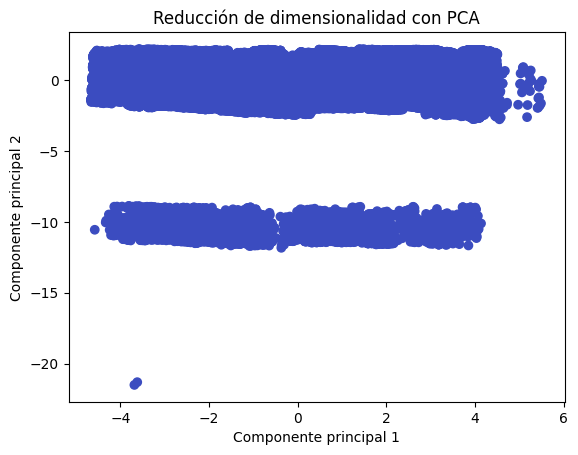

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [26]:
!pip install flask pandas scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 832.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Definir el modelo
clf = RandomForestClassifier(random_state=42)

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2, random_state=42)

# Usar solo una muestra para reducir el tiempo de ejecución
X_train_sample, _, y_arrest_train_sample, _ = train_test_split(X_train, y_arrest_train, train_size=0.1, random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Optimización de hiperparámetros con RandomizedSearchCV
clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=8, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_sample, y_arrest_train_sample)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {random_search.best_params_}")
print(f"Mejor puntuación: {random_search.best_score_}")

Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20}
Mejor puntuación: 0.9177788345785116


In [17]:
from sklearn.metrics import classification_report

In [18]:
# Evaluar el modelo con los mejores hiperparámetros
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_arrest_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96    194922
        True       0.90      0.42      0.57     28927

    accuracy                           0.92    223849
   macro avg       0.91      0.71      0.76    223849
weighted avg       0.92      0.92      0.91    223849



In [20]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 26.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.7 MB/s eta 0:00:00


In [28]:
from prophet import Prophet
import pandas as pd

In [31]:
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])

# Crear la columna 'ds' para Prophet
data['ds'] = data['Date']

# Agrupar por fecha y contar el número de incidentes por día
# Crear un nuevo DataFrame con la fecha y el conteo de incidentes
daily_data = data.groupby(data['Date'].dt.date).size().reset_index(name='y')

# Renombrar columnas para Prophet
daily_data.rename(columns={'Date': 'ds'}, inplace=True)

# Verificar el nuevo DataFrame
print(daily_data.head())

           ds     y
0  2020-01-01  1062
1  2020-01-02   638
2  2020-01-03   702
3  2020-01-04   638
4  2020-01-05   625


In [33]:
# Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(daily_data)

01:53:23 - cmdstanpy - INFO - Chain [1] start processing
01:53:23 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Hacer pronósticos futuros
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

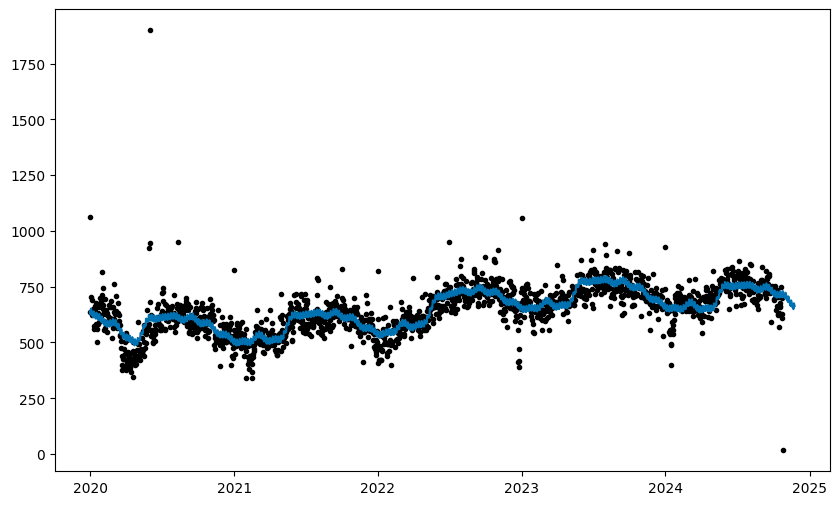

In [35]:
# Visualizar el pronóstico
fig = model.plot(forecast)
plt.show()